In [88]:

import requests
from bs4 import BeautifulSoup
import csv
r=requests.get('https://movie.douban.com/top250')
mypage= r.text

page_next=[]
url = 'https://movie.douban.com/top250'
for q in [-25,0,25,50,75,100,125,150,175,200,225]:
    page_number=str(q + 25)
    url_next=url+ "?start=" + page_number + '&filter='
    page_next.append(url_next)

cn_name = []
en_name = []
comment_number = []
rating = []

data = []

actors = []
year = []
area= []
types = []
genre = []
location = []
director  = []

for page in page_next:
    l1 = requests.get(page).text
    mypage = BeautifulSoup(l1,'html.parser')
    mylis = mypage.find('ol', attrs={'class': 'grid_view'}).find_all('li')

    for li in mylis:
        myspans = li.find('div', attrs={'class': 'hd'}).find_all('span')
        cn_name.append(myspans[0].text)
        en_name.append(myspans[1].text[3:])
        comment_number.append(li.find('div', attrs={'class': 'star'}).find_all('span')[3].text[:-3])
        rating.append(li.find('span', attrs={'class': 'rating_num'}).text)
        directors = li.find('p').text.strip()
        
        staff = directors.replace(u'\xa0', u' ')
        idx_director = staff.find('导演:')
        idx_actors = staff.find('主')
        if len(staff[idx_director:idx_actors]) < 61:
            director.append(staff[idx_director:idx_actors])
        else:
            director.append(staff[idx_director:62])
        parts = staff.split('/')
        year.append(parts[-3].split()[-1])
        area.append(parts[-2])
        types.append(parts[-1])


        # idx = director.find('主演')
        # directors.append(director[:idx])
        # actors.append(director[idx:])

        # d = [i.strip() for i in director[idx:].split('/')]
    # print(staff)
        # genre.append(d[-1])
        # location.append(d[-2]) 

# print (directors#data.append([cn_name, en_name,  rating, comment_number , director])





with open('data_new.csv','w') as f:
     writers = csv.writer(f)
     header = ['cn_name','alias','rating' , 'comment_number' , 'director','year','area','types']
     writers.writerow(header)
     writers.writerows(zip(cn_name,en_name,rating,comment_number,director,year,area,types))
#      writers.writerow(year)
#      writers.writerow(rating)
#      writers.writerow(types)

In [89]:
import pandas
import matplotlib
import seaborn

In [90]:
df = pandas.read_csv('data_new.csv')
df

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,1011163,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,735302,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,949976,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,807900,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,471710,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
5,千与千寻,千と千尋の神隠し,9.2,755995,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,747427,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,429643,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,847669,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,555883,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


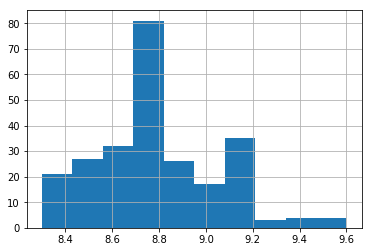

In [91]:
df['rating'].hist(bins=10)

In [92]:
df['year'].value_counts()

2004          13
2010          13
2001          12
1994          11
2011          10
2013          10
2008          10
2009          10
2006           9
1997           9
2014           9
2002           9
2003           8
1999           8
1995           8
2015           7
2000           7
1993           7
2016           6
2007           6
1998           5
2012           5
1988           5
1996           5
1991           5
2005           4
1990           3
1987           3
1957           2
1992           2
1989           2
1966           2
1984           2
1986           2
1953           2
1954           1
1931           1
1975           1
1960           1
1936           1
1942           1
1971           1
1952           1
1974           1
2017           1
1982           1
1939           1
1965           1
1980           1
2004(中国大陆)     1
1950           1
1940           1
1979           1
1972           1
Name: year, dtype: int64

([<matplotlib.axis.XTick at 0x116da2160>,
 <a list of 6 Text xticklabel objects>)

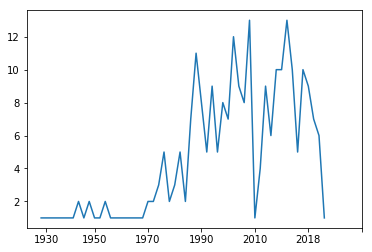

In [93]:
from matplotlib import pyplot as plt
df.sort_values(by='rating', ascending=False)
s_year = df['year'].value_counts()
s_year= s_year.sort_index()
plt.plot(s_year.index, s_year.values)
plt.xticks([1,10,20,30,40,50,60],['1930','1950','1970','1990','2010','2018'])

from the line graph，we have a clear idea of the distribution of the movie in different years.and then, we can find nearly 43 percent of top250 movies were produced in the 21st century which mainly because of the transformation of societies and the rapid development of medium technology.

In [94]:
df.sort_values(by='rating', ascending=False).head(10)

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,1011163,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
41,控方证人,Witness for the Prosecution,9.6,109642,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑
4,美丽人生,La vita è bella,9.5,471710,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,735302,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,949976,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
7,辛德勒的名单,Schindler's List,9.4,429643,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
26,十二怒汉,12 Angry Men,9.4,189584,导演: Sidney Lumet,1957,美国,剧情
3,阿甘正传,Forrest Gump,9.4,807900,导演: Robert Zemeckis,1994,美国,剧情 爱情
44,海豚湾,The Cove,9.3,195043,导演: Louie Psihoyos,2009,美国,纪录片
8,盗梦空间,Inception,9.3,847669,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险


On the other hand, by analyzing the rating of Top10 movies, we found that seven of the top 10 movies come from the United States which is sufficient to prove the quality and popularity of American movies. Therefore, it is normal that the list of Oscar winners which is usually dominated by American films and actors.

In [95]:
df9= df.sort_values(by='comment_number', ascending=False).head(100)
df9

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,1011163,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
2,这个杀手不太冷,Léon,9.4,949976,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,847669,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
3,阿甘正传,Forrest Gump,9.4,807900,导演: Robert Zemeckis,1994,美国,剧情 爱情
11,三傻大闹宝莱坞,3 Idiots,9.2,761502,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
5,千与千寻,千と千尋の神隠し,9.2,755995,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,747427,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,735302,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
76,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,672778,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
10,海上钢琴师,La leggenda del pianista sull'oceano,9.2,653818,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1998,意大利,剧情 音乐


In [96]:
df9[df9['rating'] > 9.0].sort_values(by='comment_number', ascending=True)

,cn_name,alias,rating,comment_number,director,year,area,types
39,两杆大烟枪,"Lock, Stock and Two Smoking Barrels",9.1,295156,导演: Guy Ritchie,1998,英国,剧情 喜剧 犯罪
20,乱世佳人,Gone with the Wind,9.2,297532,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争
32,活着,人生 / Lifetimes,9.1,303653,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
18,熔炉,도가니,9.2,305905,导演: 黄东赫 Dong-hyuk Hwang,2011,韩国,剧情
31,指环王3：王者无敌,The Lord of the Rings: The Return of the King,9.1,312873,导演: 彼得·杰克逊 Peter Jackson,2003,美国 新西兰,剧情 动作 奇幻 冒险
24,天堂电影院,Nuovo Cinema Paradiso,9.1,336139,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1988,意大利 法国,剧情 爱情
17,教父,The Godfather,9.2,382336,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
21,触不可及,Intouchables,9.1,412449,导演: 奥利维·那卡什 Olivier Nakache / 艾力克·托兰达 Eric Tol...,2011,法国,剧情 喜剧
7,辛德勒的名单,Schindler's List,9.4,429643,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
16,龙猫,となりのトトロ,9.1,469830,导演: 宫崎骏 Hayao Miyazaki,1988,日本,儿童 动画 奇幻 家庭


In [97]:
df9[df9['rating'] < 9.0].sort_values(by='comment_number', ascending=False)

,cn_name,alias,rating,comment_number,director,year,area,types
76,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,672778,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
25,怦然心动,Flipped,8.9,627866,导演: 罗伯·莱纳 Rob Reiner,2010,美国,剧情 喜剧 爱情
23,当幸福来敲门,The Pursuit of Happyness,8.9,601909,导演: 加布里尔·穆奇诺 Gabriele Muccino,2006,美国,剧情 传记 家庭
103,阿凡达,Avatar,8.6,561934,导演: 詹姆斯·卡梅隆 James Cameron,2009,美国 英国,动作 战争 科幻 冒险
37,飞屋环游记,Up,8.9,551044,导演: 彼特·道格特 Pete Docter / 鲍勃·彼德森 Bob Peterson,2009,美国,剧情 喜剧 动画 冒险
67,剪刀手爱德华,Edward Scissorhands,8.7,520771,导演: Tim Burton,1990,美国,剧情 奇幻 爱情
58,天使爱美丽,Le fabuleux destin d'Amélie Poulain,8.7,517562,导演: 让-皮埃尔·热内 Jean-Pierre Jeunet,2001,法国 德国,喜剧 爱情
215,你的名字。,君の名は。,8.4,488900,导演: 新海诚 Makoto Shinkai,2016,日本,剧情 爱情 动画
217,初恋这件小事,สิ่งเล็กเล็กที่เรียกว่า...รัก,8.3,476997,导演: 普特鹏·普罗萨卡·那·萨克那卡林 Puttipong Promsaka Na Sak...,2010,泰国,剧情 喜剧 爱情
59,七宗罪,Se7en,8.7,466490,导演: 大卫·芬奇 David Fincher,1995,美国,剧情 犯罪 悬疑 惊悚


By analyzing the relationship between the number of comments and the ratings of the movies. It is interesting to find out that some high score movies have a lower number of discussions, but some of the movies with relatively lower ratings gain more attention by the majority of audiences.

In [98]:
def is_select(x):
    return x.find('印度') != -1 
df1 = df[df['area'].apply(is_select)]
df1

,cn_name,alias,rating,comment_number,director,year,area,types
11,三傻大闹宝莱坞,3 Idiots,9.2,761502,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
54,摔跤吧！爸爸,Dangal,9.1,511397,导演: 涅提·蒂瓦里 Nitesh Tiwari,2016,印度,剧情 传记 运动 家庭
179,地球上的星星,Taare Zameen Par,8.8,89176,导演: 阿米尔·汗 Aamir Khan,2007,印度,剧情 儿童 家庭
223,小萝莉的猴神大叔,Bajrangi Bhaijaan,8.6,135890,导演: 卡比尔·汗 Kabir Khan,2015,印度,剧情 喜剧 动作


Due to the great box office performance of Indian films in the Chinese market in recent years, I list the Indian films from the top 250 list. The figures show that there are four films on the list. Although only 4 films were selected, their ratings are all over the average score (8.78). It’s interesting that most of these movies are either directed or starred by Indian movie star Amir Khan.